# Graded Lab IV

In [49]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

**Part 1: Implementing and Analyzing Red-Black Trees**

In your 2C03 lectures, you have studied Red-Black Trees (RBT) and seen (at least in theory) how they are
implemented. If you do not remember them or never studied them, now is the time. Below are a few
useful links that include the pseudo-code implementation of RBT. I will try to cover some of the concepts
in class, but since covering theory is NOT the goal of this class, I might not go in depth.
- Introduction to Algorithms, CLRS, 3rd Edition
- https://www.cs.cornell.edu/courses/cs312/2005sp/lectures/lec15.html
- https://www.youtube.com/watch?v=ZxCvM-9BaXE

Given in the notebook is a partial implementation of Red Black Trees with three methods rotate_left (),
rotate_right(), fix().Rotate_left performs the operation of rotating the node left and Rotate_right performs
the operation of rotating the node right. The nodes also point back to their parents, and the fix method
updates the tree once the rotation has been made.

**Part 1.1**

In this exercise, complete these implementations by enforcing the properties of Binary Search Trees that
make it an RBT. Two of these properties are:
- Red nodes cannot have red children.
- All simple paths from the root to a leaf must contain the same number of black nodes.

Every time you insert an element in the tree, the above properties get violated and need to be fixed
(remember how we adjust the heap in priority queues?)

In [50]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self, tree):
        y = self.left
        self.left = y.right
        if y.right != None:
          y.right.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.right:
          self.parent.right = y
        else:
          self.parent.left = y
        y.right = self
        self.parent = y

        return tree

    def rotate_left(self, tree):
        y = self.right
        self.right = y.left
        if y.left != None:
          y.left.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.left:
          self.parent.left = y
        else:
          self.parent.right = y
        y.left = self
        self.parent = y
        return tree


In [51]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
             self = self.__insert(self.root, value)
        return self

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self = self.fix(node.left)

            else:
                self = self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self = self.fix(node.right)
            else:
                self = self.__insert(node.right, value)

        return self

    def fix(self, node):
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red() and node.is_red():
            #if there are two red nodes in a row
            P = node.parent
            C = node
            G = P.parent
            U = C.get_uncle()

            if U == None:
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red

                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()

              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            elif U.is_black():
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red
                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()
              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            else:
              #G = red
              #P = black, U = black
              G.make_red()
              P.make_black()
              U.make_black()

            if G.parent != None:
              if G.is_red() and G.parent.is_red():
                self = self.fix(G)

        self.root.make_black()
        return self

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [52]:
#some RBTree examples from online that were used to test the functions

# tree1 = RBTree()
# tree1 = tree1.insert(3)
# tree1 = tree1.insert(21)
# tree1 = tree1.insert(32)
# tree1 = tree1.insert(15)

# # print(tree1)
# print(tree1.root)
# print(tree1.root.left)
# print(tree1.root.right)
# print(tree1.root.left.right)


# tree2 = RBTree()
# tree2 = tree2.insert(8)
# tree2 = tree2.insert(18)
# tree2 = tree2.insert(5)
# tree2 = tree2.insert(15)
# tree2 = tree2.insert(17)
# tree2 = tree2.insert(25)
# tree2 = tree2.insert(40)
# tree2 = tree2.insert(80)

# print(tree2.root)
# print(tree2.root.left)
# print(tree2.root.right)
# print(tree2.root.left.left)
# print(tree2.root.left.right)
# print(tree2.root.right.left)
# print(tree2.root.right.right)
# print(tree2.root.right.right.left)
# print(tree2.root.right.right.right)
# print(tree2.root.right.right.right.right)


# tree3 = RBTree()
# tree3 = tree3.insert(30)
# tree3 = tree3.insert(50)
# tree3 = tree3.insert(40)
# tree3 = tree3.insert(20)
# tree3 = tree3.insert(10)

# print(tree3.root)
# print(tree3.root.left)
# print(tree3.root.right)
# print(tree3.root.left.left)
# print(tree3.root.left.right)


# tree4 = RBTree()
# tree4 = tree4.insert(2)
# tree4 = tree4.insert(1)
# tree4 = tree4.insert(4)
# tree4 = tree4.insert(5)
# tree4 = tree4.insert(9)
# tree4 = tree4.insert(3)
# tree4 = tree4.insert(6)
# tree4 = tree4.insert(7)

# print(tree4.root)
# print(tree4.root.left)
# print(tree4.root.right)
# print(tree4.root.right.left)
# print(tree4.root.right.right)
# print(tree4.root.right.left.left)
# print(tree4.root.right.right.left)
# print(tree4.root.right.right.right)


# tree5 = RBTree()
# tree5 = tree5.insert(41)
# tree5 = tree5.insert(38)
# tree5 = tree5.insert(31)
# tree5 = tree5.insert(12)
# tree5 = tree5.insert(19)
# tree5 = tree5.insert(8)

# print(tree5.root)
# print(tree5.root.left)
# print(tree5.root.right)
# print(tree5.root.left.left)
# print(tree5.root.left.right)
# print(tree5.root.left.left.left)

**Part 1.2**

The essential difference between RBTs and BSTs is that RBTs are self-balancing and hence offer a
computational advantage. However, that may not always be the case. In this experiment, you will design
an experiment to test out this theory. Generate a list of length 10000 elements and create both BSTs and
RBTs using that list. You will realize that the kind of empirical tests you have done in the past may not
work here. So how can you test which is better? The height of the two trees can give you a good intuition.
Test the average difference between the height of the two trees created on the same list. In your reflection
section, explain why this difference is important and how it can be leveraged to select between RBTs and
BSTs. You run multiple experiments on different lists and plot a graph on tree heights to support your
reflection.

In [53]:
class BSTNode:
  def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

def BSTSearch(node, value):
  if node == None:
    return None

  if value > node.value:
    return BSTSearch(node.right, value)

  if value < node.value:
    return BSTSearch(node.left, value)

  return node.value

def BSTInsert(root, value):
  node = BSTNode(value)
  return BSTInsertNode(root, node)

def BSTInsertNode(root, node):
  if root == None:
    return node

  if node.value == root.value:
    return root
  elif node.value < root.value:
    root.left = BSTInsertNode(root.left, node)
  elif node.value > root.value:
    root.right = BSTInsertNode(root.right, node)

  return root

def BSTHeight(node):
    if node == None:
        return 0
    return BSTGetHeight(node)

def BSTGetHeight(node):
    if node == None:
        return 0

    return 1 + max(BSTGetHeight(node.left), BSTGetHeight(node.right))


In [54]:
def draw_show_plot1(run_arr, ylabel, title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

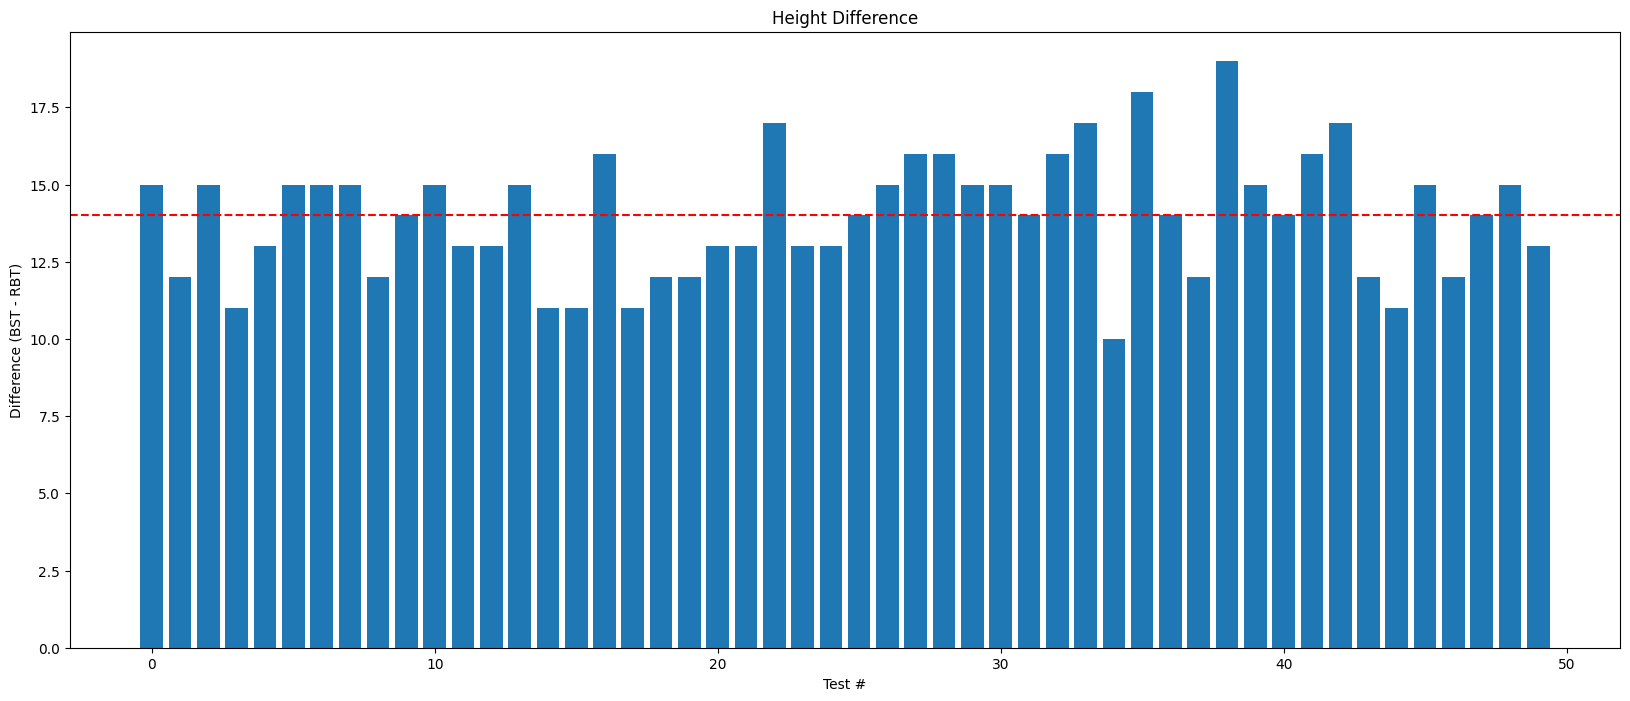

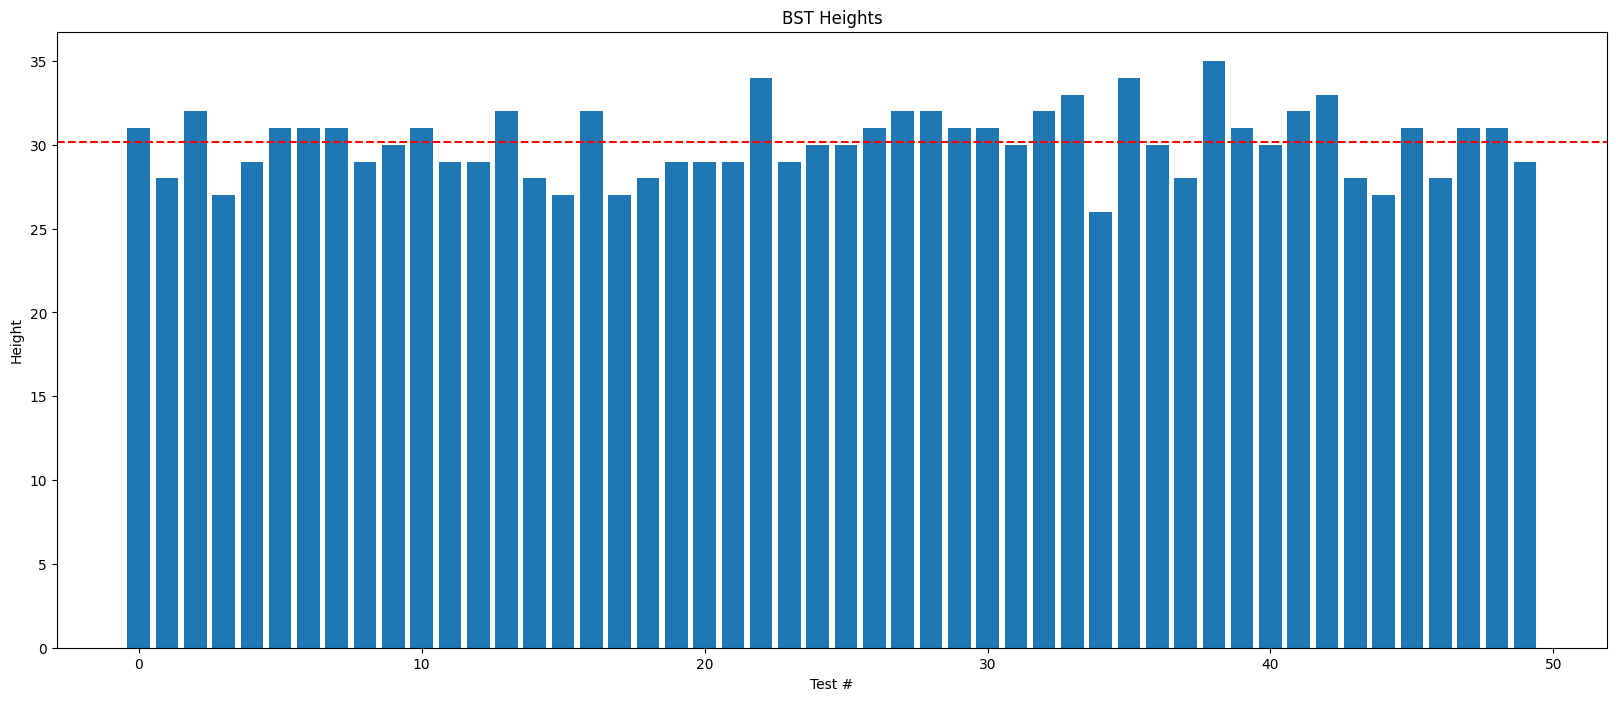

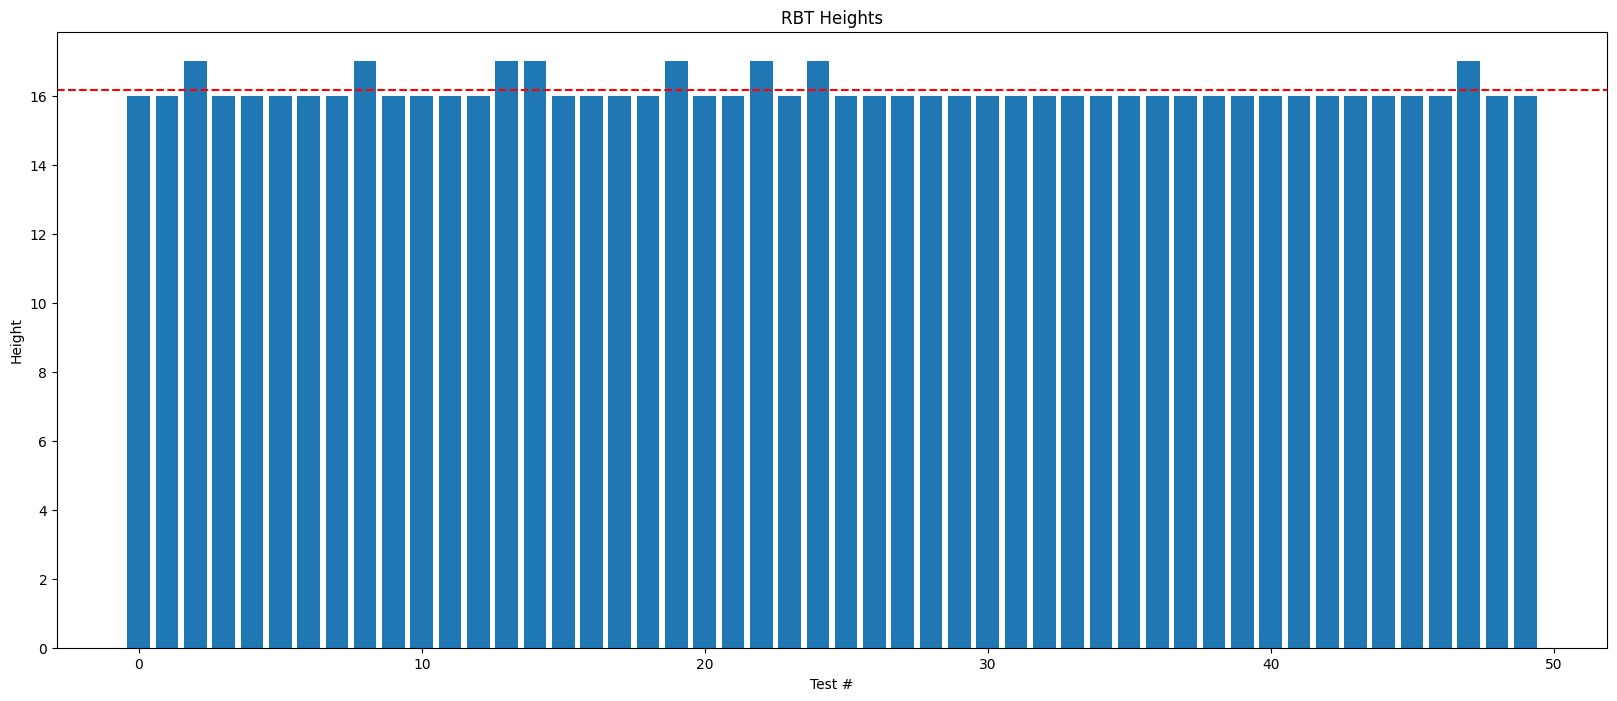

In [55]:
#50 random lists will be generated
runs = 50
#the 50 differences in height (BST height - RBT height) will be stored in differences to print later
differences = []
BSTHeights = []
RBTHeights = []

for _ in range(runs):
  #generate a random number between 1 and 20,000 to create the BST and RBT
  temp = random.randrange(1, 20000)
  BST = BSTNode(temp)
  RBT = RBTree()
  RBT.insert(temp)

  #generate the remaining random 9999 numbers and add them to both trees
  for _ in range(9999):
    temp = random.randrange(1, 20000)
    RBT.insert(temp)
    BSTInsert(BST, temp)

  bstheight = BSTHeight(BST)
  rbtheight = RBT.get_height()

  differences.append(bstheight - rbtheight)
  BSTHeights.append(bstheight)
  RBTHeights.append(rbtheight)

# print(differences)
draw_show_plot1(differences, "Difference (BST - RBT)", "Height Difference")
draw_show_plot1(BSTHeights, "Height", "BST Heights")
draw_show_plot1(RBTHeights, "Height", "RBT Heights")

**Reflection**

Outline of Experiment:
- 10 000 random integers between 1 and 20,000 are generated and inserted into both a red-black tree and a binary search tree.
- After all of the integers have been added to the trees, the difference in their heights is found using (height of BST) - (height of RBT), as the BST should have a larger height since RBTs are self-balancing.
- This is repeated 50 times to find the average height difference, as well as the average heights of the trees.

Results:
- It can be seen in the three graphs that on average, the height of an RBT with 10 000 elements is 14 less than the height of a BST with the same elements.
- On average, the heights for the BSTs were around 30, while the heights for the RBTs were around 16.

Why is this difference important? How can this be used to select between RBTs and BSTs?
- This difference is important as it shows that depending on the input values, BSTs can start to lean towards their worst case easily, making them more comparable to a list and reducing the usefullness of the tree/binary search. This can be seen as their heights were twice the size of the RBT heights.
- Since RBTs are self-balancing, they keep their perfect black balance, so searching through them is always more efficient. They never start approaching linear time as regular BSTs do.
- This can be used to select between RBTs and BSTs as it can clearly be seen that RBTs will continue to maintain balance, no matter the size of the tree, so searching and inserting will always be faster, whereas with BSTs the balance is easily lost, and it only gets worse as more elements are added. This makes red-black trees a better option.

**Part 1.3**

In this experiment, generate a perfectly sorted list and record the difference between the height of the two
trees for multiple rounds. Then create different versions of the list varying the level of “unsortedness”
(like you have done in previous labs with near-sorted lists and unsorted lists). You can use controlled
quicksort to create these versions of near-sorted list. In your reflection, describe the experiment design,
and the runs, and show in the graph how the “degree of sortedness” impacts the height of the two trees.
Refer to the swap count experiment you ran to determine the degree of sortedness. Write a detailed
reflection on what you observe and why it might happen.

In [56]:
class BSTNode:
  def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

# BST insert function to avoid recursion
def BSTInsertIterative(root, value):
    node = BSTNode(value)
    if root is None:
        return node
    current = root
    while True:
        if value < current.value:
            if current.left is None:
                current.left = node
                break
            current = current.left
        else:
            if current.right is None:
                current.right = node
                break
            current = current.right
    return root

# BST height calculation to avoid recursion limit
def BSTHeightIterative(root):
    if root is None:
        return 0
    max_height = 0
    node_stack = [(root, 1)] # stores nodes along with their depth
    while node_stack:
        node, depth = node_stack.pop()
        if node is not None:
            max_height = max(max_height, depth)
            node_stack.append((node.left, depth + 1))
            node_stack.append((node.right, depth + 1))
    return max_height

def BSTSearch(node, value):
  if node == None:
    return None

  if value > node.value:
    return BSTSearch(node.right, value)

  if value < node.value:
    return BSTSearch(node.left, value)

  return node.value

def BSTInsert(root, value):
  node = BSTNode(value)
  return BSTInsertNode(root, node)

def BSTInsertNode(root, node):
  if root == None:
    return node

  if node.value == root.value:
    return root
  elif node.value < root.value:
    root.left = BSTInsertNode(root.left, node)
  elif node.value > root.value:
    root.right = BSTInsertNode(root.right, node)

  return root

def BSTHeight(node):
    if node == None:
        return 0
    return BSTGetHeight(node)

def BSTGetHeight(node):
    if node == None:
        return 0

    return 1 + max(BSTGetHeight(node.left), BSTGetHeight(node.right))


In this experiment, we will generate lists with varying degrees of "sortedness" and observe how it affects the height of Binary Search Trees (BSTs) and Red-Black Trees (RBTs). We'll start with a perfectly sorted list and then create different versions of the list with increasing levels of unsortedness using a controlled quicksort algorithm.

**Generate a perfectly sorted list**

In [57]:
sorted_list = list(range(1, 10001))  # list of numbers from 1 to 10000

**Insert Elements into BST and RBT and Record Heights**

In [58]:
bst_root = None
rbt = RBTree()

# insert elements into BST and RBT and record their heights
for value in sorted_list:
    bst_root = BSTInsertIterative(bst_root, value)
    rbt.insert(value)

# calculate heights of both trees using the iterative height function for BST
bst_height = BSTHeightIterative(bst_root)
rbt_height = rbt.get_height()

# record the height difference
height_difference = bst_height - rbt_height

# print the heights and the height difference
print("BST Height:", bst_height)
print("RBT Height:", rbt_height)
print("Height Difference:", height_difference)


BST Height: 10000
RBT Height: 24
Height Difference: 9976


**Explanation**

A sorted list of 10,000 elements was generated and inserted into a BST and RBT. The BST height reached 10,000 degenerate linked list, while the RBT height was just 24, showcasing the self-balancing advantage of RBTs.

**Controlled Quicksort Function Explanation:**
The controlled quicksort function sorts a list while tracking the number of swaps performed, providing a measure of the list's "sortedness". It selects a pivot, partitions the array based on the pivot, and recursively sorts the partitions. This function is used to create lists with varying degrees of sortedness for experimentation.


In [59]:
# function to perform the partitioning step in quicksort
def partition(arr, start, end):
    global swap_count
    pivot = arr[end]
    p_index = start
    for i in range(start, end):
        if arr[i] <= pivot:
            arr[i], arr[p_index] = arr[p_index], arr[i]
            swap_count += 1
            p_index += 1
    arr[p_index], arr[end] = arr[end], arr[p_index]
    swap_count += 1
    return p_index

# main function that implements controlled quicksort
def controlled_quicksort(arr, start, end):
    global swap_count
    if start < end:
        p_index = partition(arr, start, end)
        controlled_quicksort(arr, start, p_index - 1)
        controlled_quicksort(arr, p_index + 1, end)

# example
swap_count = 0
sample_list = [x for x in range(1, 10001)]  # list of numbers from 1 to 10000
random.shuffle(sample_list)  # shuffle the list to simulate unsortedness
controlled_quicksort(sample_list, 0, len(sample_list) - 1)  # sort the list and count swaps

# output the total swaps to sort the list
print(f"Total swaps to sort the list: {swap_count}")


Total swaps to sort the list: 77406


**Explanation:**
The controlled quicksort algorithm sorts a list while tracking the number of swaps performed. By limiting the number of swaps allowed, we can generate lists with varying degrees of sortedness - from nearly sorted to completely unsorted. This helps simulate real-world scenarios where the data may not be perfectly sorted.

The variation of the algorithm introduces a swap limit (swap_limit) to halt the sorting process after a specific number of swaps. This allows us to create partially sorted lists with controlled levels of unsortedness.

In [60]:
def controlled_quicksort_with_limit(arr, start, end, swap_limit):
    global swap_count
    if start < end and swap_count < swap_limit:
        p_index = partition_with_limit(arr, start, end, swap_limit)
        controlled_quicksort_with_limit(arr, start, p_index - 1, swap_limit)
        controlled_quicksort_with_limit(arr, p_index + 1, end, swap_limit)

def partition_with_limit(arr, start, end, swap_limit):
    global swap_count
    pivot = arr[end]
    p_index = start
    for i in range(start, end):
        if arr[i] <= pivot:
            arr[i], arr[p_index] = arr[p_index], arr[i]
            swap_count += 1
            if swap_count >= swap_limit:
                return p_index
            p_index += 1
    arr[p_index], arr[end] = arr[end], arr[p_index]
    swap_count += 1
    return p_index

# function to generate a list with a given degree of sortedness
def generate_partially_sorted_list(size, swap_limit):
    global swap_count
    swap_count = 0
    shuffled_list = list(range(1, size + 1))
    random.shuffle(shuffled_list)
    controlled_quicksort_with_limit(shuffled_list, 0, size - 1, swap_limit)
    return shuffled_list, swap_count

# example usage: generate lists with different swap limits
swap_limits = [100, 1000, 5000, 10000, 25000, 50000, 75000]  # Swap limits to simulate different levels of sortedness
sortedness_data = []

for limit in swap_limits:
    partial_list, swaps_used = generate_partially_sorted_list(10000, limit)
    sortedness_data.append((limit, swaps_used, partial_list))

for data in sortedness_data:
    print(f"Swap limit: {data[0]}, Swaps used: {data[1]}, First 10 elements: {data[2][:10]}")


Swap limit: 100, Swaps used: 100, First 10 elements: [142, 2437, 3431, 2241, 2403, 2199, 857, 3010, 3935, 2570]
Swap limit: 1000, Swaps used: 1000, First 10 elements: [1230, 3467, 1033, 66, 1183, 1438, 1854, 3032, 1215, 3296]
Swap limit: 5000, Swaps used: 5000, First 10 elements: [3781, 8752, 200, 5113, 4100, 9792, 5942, 4316, 8735, 1793]
Swap limit: 10000, Swaps used: 10000, First 10 elements: [803, 511, 517, 188, 479, 149, 563, 579, 736, 176]
Swap limit: 25000, Swaps used: 25000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Swap limit: 50000, Swaps used: 50000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Swap limit: 75000, Swaps used: 75000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Explanation:** The controlled quicksort algorithm can be modified to halt after a set number of swaps, allowing the generation of lists with varying degrees of sortedness. This helps simulate real-world scenarios where data may not be perfectly sorted or unsorted.


In [61]:
#  BSTInsertIterative and BSTHeightIterative are already defined previously

# function to insert elements into a BST and return its height
def insert_and_get_height_bst(list_to_insert):
    bst_root = None
    for value in list_to_insert:
        bst_root = BSTInsertIterative(bst_root, value)
    return BSTHeightIterative(bst_root)

# function to insert elements into an RBT and return its height
def insert_and_get_height_rbt(list_to_insert):
    rbt = RBTree()
    for value in list_to_insert:
        rbt.insert(value)
    return rbt.get_height()

# recording heights for each degree of sortedness
heights_data = []
for data in sortedness_data:
    swap_limit, swaps_used, partial_list = data
    bst_height = insert_and_get_height_bst(partial_list)
    rbt_height = insert_and_get_height_rbt(partial_list)
    heights_data.append((swap_limit, swaps_used, bst_height, rbt_height))

# displaying the collected data
for height_data in heights_data:
    print(f"Swap limit: {height_data[0]}, Swaps used: {height_data[1]}, BST Height: {height_data[2]}, RBT Height: {height_data[3]}")


Swap limit: 100, Swaps used: 100, BST Height: 34, RBT Height: 16
Swap limit: 1000, Swaps used: 1000, BST Height: 34, RBT Height: 16
Swap limit: 5000, Swaps used: 5000, BST Height: 33, RBT Height: 16
Swap limit: 10000, Swaps used: 10000, BST Height: 47, RBT Height: 17
Swap limit: 25000, Swaps used: 25000, BST Height: 2485, RBT Height: 21
Swap limit: 50000, Swaps used: 50000, BST Height: 5467, RBT Height: 22
Swap limit: 75000, Swaps used: 75000, BST Height: 8942, RBT Height: 24


**Explanation:** The partially sorted lists were inserted into both BST and RBT, recording their respective heights. The data showed the divergence in heights between the two tree types as the degree of sortedness increased.

**Plotting the Data**

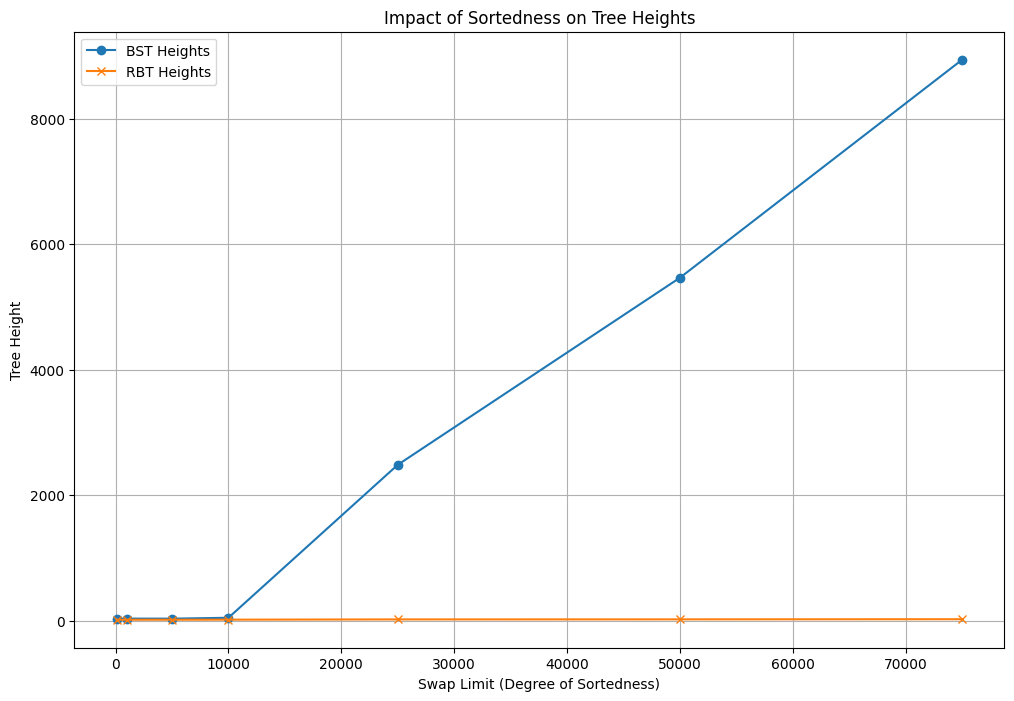

In [62]:
import matplotlib.pyplot as plt

# Extracting data for plotting
swap_limits, swaps_used, bst_heights, rbt_heights = zip(*[(d[0], d[1], d[2], d[3]) for d in heights_data])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(swap_limits, bst_heights, label='BST Heights', marker='o')
plt.plot(swap_limits, rbt_heights, label='RBT Heights', marker='x')
plt.title('Impact of Sortedness on Tree Heights')
plt.xlabel('Swap Limit (Degree of Sortedness)')
plt.ylabel('Tree Height')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:** The code plots the BST and RBT heights against the swap limit (degree of sortedness). The graph shows BST height increasing steeply as data becomes more sorted, while RBT height remains relatively low and stable.

**Reflection**

The experiment showed BST height increasing dramatically with more sorted data, as BSTs degenerate into linked lists without self-balancing. In contrast, RBT height remained relatively low and stable due to self-balancing, ensuring O(log n) height even for sorted data.

The findings highlight the importance of using self-balancing trees like RBTs when dealing with potentially sorted data, to maintain efficient operations and prevent performance degradation seen in unbalanced BSTs.

RBTs are the better choice when data sortedness is unpredictable, as they provide consistent performance. Further exploration of other self-balancing tree structures under similar conditions could be insightful.


**Part 2: Making Binary Search Dynamic**

Binary search of a sorted array takes logarithmic search time. However, if you notice closely, the
insertion of new element takes linear time. By keeping several sorted arrays, you can improve the time for
insertion. For instance, you can SEARCH and INSERT separately on a set of n values.

In [63]:
# Make function that makes randomly generated arrays
import math
import random

# Using the random create list function used in lectures/labs
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

# Making randomly generated arrays from the description
def rand_list(n):
    if n == 0: # Accounting for if n = 0 (meaning an empty list can be generated)
        return [[]]

    k = int(math.floor(math.log2(n)) + 1) # Length of binary string representing n
    array_list = []

    bin_string = (bin(n))[2:] # Removing the "0b" prefix of the binary string
    rev_bin_string = bin_string[::-1] # Reversing the binary string so I can index each digit correctly (least significant digits first)


    for j in range(k): # Iterating through the string to check each character
        if rev_bin_string[j] == '0':
            array_list.append([])
        else:
            length = math.pow(2, j) # Computes length of list using index in binary string
            array_list.append(sorted(create_list_custom(int(length), 100)))

    array_list = array_list[::-1]
    return array_list # Reversing array_list to ensure the subarray lengths match the binary representation of n

# Testing:
# rand_list(3)
# rand_list(0)
# rand_list(1)
# print(rand_list(15))
# print(rand_list(4))

**Part 2.1**

Implement the SEARCH, INSERT, and DELETE operations for binary search using the above description. For this, the code has not been provided. Feel free to go back to previous labs and use the Binary Search implementations discussed there, to build on.

In [64]:
# Part 2.1
# Implementing insert operation
import math

def bs_insert(array_list, element, index):

    basic_list = []
    new_array_list = []
    # Making a one-dimensional list with the elements in array_list
    for i in array_list:
        for j in i:
            basic_list.append(j)
    basic_list.insert(index, element) # Inserting the element based on index
    # The given index determines which subarray the new element will be placed in,
    # but each subarray will be sorted later so this may affect the element's overall position

    # To make my new list, I'm going to modify the rand_list function I made previously
    new_length = len(basic_list) # This is the new n value
    k = math.floor(math.log2(new_length)) + 1
    bin_string = (bin(new_length))[2:]

    for j in range(k): # Iterating through the string to check each character
        if bin_string[j] == '0':
            new_array_list.append([])
        else:
            subarray_length = int(math.pow(2, j)) # Computes length of subarray using index in binary string
            new_array_list.append(basic_list[:subarray_length]) # slicing the one-dimensional list to get the desired elements
            basic_list = basic_list[subarray_length:] # slicing the one-dimensional list to remove the elements that were added to new_array_list

    for l in new_array_list: # Since this inserted element could be any value, I sort each subarray just as a precaution
        l.sort()

    # print("new array list: ", new_array_list)
    return new_array_list

# Testing
# x = rand_list(14)
# print(bs_insert(x, 7, 0))



# Implementing delete operation
# I can use the same logic as the bs_insert
def bs_delete(array_list, index): # Assuming that the function deletes a value from the array given a certain index


    basic_list = []
    new_array_list = []
    # Making a one-dimensional list with the elements in array_list
    for i in array_list:
        for j in i:
            basic_list.append(j)

    basic_list = basic_list[:index] + basic_list[index + 1:]

    new_length = len(basic_list) # This is the new n value

    if new_length == 0: # Checks if the deletion removed all the values
        return [[]]

    k = math.floor(math.log2(new_length)) + 1
    bin_string = (bin(new_length))[2:]

    rev_bin_string = bin_string[::-1]

    for j in range(k): # Iterating through the string to check each character
        if rev_bin_string[j] == '0':
            new_array_list.append([])
        else:
            subarray_length = int(math.pow(2, j)) # Computes length of subarray using index in binary string
            new_array_list.append(basic_list[:subarray_length]) # slicing the one-dimensional list to get the desired elements
            basic_list = basic_list[subarray_length:] # slicing the one-dimensional list to remove the elements that were added to new_array_list

    for l in new_array_list: # Since this inserted element could be any value, I sort each subarray just as a precaution
        l.sort()

    # print("new array list: ", new_array_list)
    return new_array_list


# Testing
# x = rand_list(14)
# print(bs_insert(x, 7, 0))
# x = rand_list(14)
# print(bs_delete(x, 7))

# Implementing binary search operation
def bs_search(array_list, key_value, current_index=0):
    # This function will go through each subarray and output the index of the given value using recursion
    working_copy = [[a for a in b] for b in array_list]
    # print(working_copy)

    if len(working_copy) == 0: # Last subarray in working_copy has been reached, and the item has not been found
        return -1

    # Go to first subarray and check its length
    subarray_length = len(working_copy[0])
    current_subarray = working_copy[0]
    working_copy = working_copy[1:] # remove the first subarray

    if subarray_length == 0: # Checking if current subarray is empty
        return bs_search(working_copy, key_value, current_index) # Use recursion to plug in the modified working array with the same index value (as there are no new elements)

    # Since each subarray is sorted, I can skip over the subarray by only checking if the first element in it is larger than the key value OR if the last element in it is less than the key value
    if (current_subarray[0] > key_value) or (current_subarray[-1] < key_value):
        return bs_search(working_copy, key_value, current_index + subarray_length) # Incrementing the current index by the length of the subarray (since all elements are skipped)
    else:
        # Now I can implement regular binary search (similar to the first implementation we did in lecture)
        lower = 0
        upper = subarray_length - 1
        while lower <= upper:
            mid = (lower+upper)//2
            if current_subarray[mid] == key_value:
                return current_index + mid # Returning the proper index if the key value is found
            if current_subarray[mid] < key_value:
                lower = mid+1
            else:
                upper=mid-1
        # This code section below only executes if the key value is not found while iterating through the subarray
        return bs_search(working_copy, key_value, current_index + subarray_length) # Recursive call that adds the length of this subarray to the current index

# Testing
# x = rand_list(4)
# y = bs_insert(x, 40, 3) # array, element, index
# bs_search(y, 40)



**Part 2.2**

In this section, you will compare your implementation against traditional implementations. Take ALL the Binary Search implementations we have discussed in the first few weeks and design an experiment to compare the performance against your dynamic implementation.

In your reflection section, describe in detail the experiment design, what are the various list sizes and the number of trials you chose? Also, describe your observations. Did you notice any performance improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in detail your experiments design, and the observations.

In [65]:
# Declaring experimental and plotting functions we've used in class

def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list


import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_show_plot(run_arr, title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel("Runtime")
    plt.title(title)
    plt.show()

In [66]:
# Defining the binary search implementations we've covered

# Implementations from the L02_Class_Notes lecture
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid

    return item_list[lower]==to_find

def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1

    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:

        mid = (left+right)//2

        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

# Recursive binary search implementation from Lab 2

def binary_search_4(item_list, to_find, low=0, high=None):
    # Define the high boundary on the first call
    if high is None:
        high = len(item_list) - 1

    # Base case: if the low boundary exceeds the high, the item is not found
    if low > high:
        return False

    # Calculate the middle index
    mid = (low + high) // 2

    # Check if the middle element is the one we're looking for
    if item_list[mid] == to_find:
        return True
    # If the item we're looking for is greater, ignore the left half
    elif item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid + 1, high)
    # If the item we're looking for is smaller, ignore the right half
    else:
        return binary_search_4(item_list, to_find, low, mid - 1)

# Possible cases I'm going to consider:
# - Target element is not located in the array
# - Target element is the last element in the array
# - Lists with multiple elements that are the same value
# These are typically the worst cases of any standard binary search algorithm


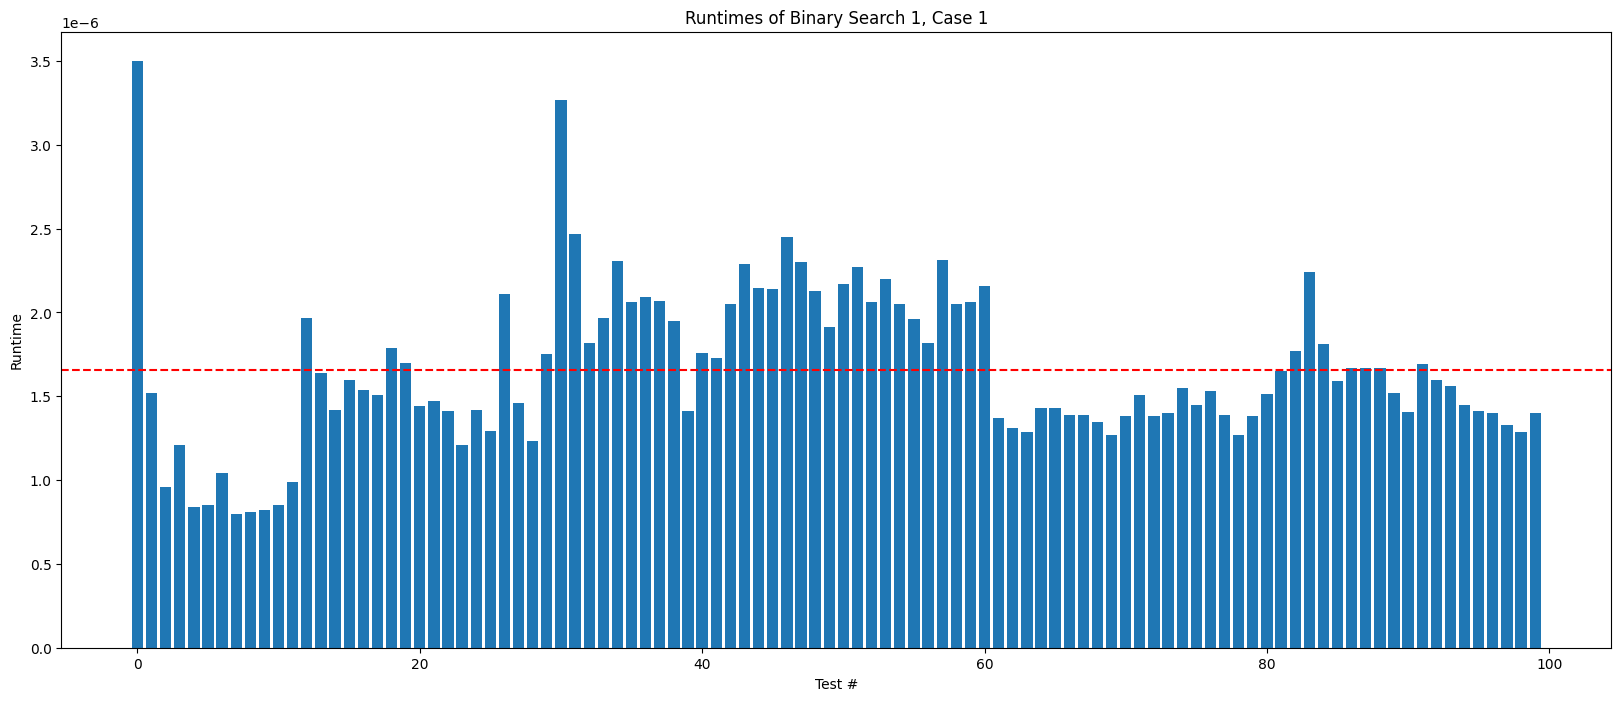

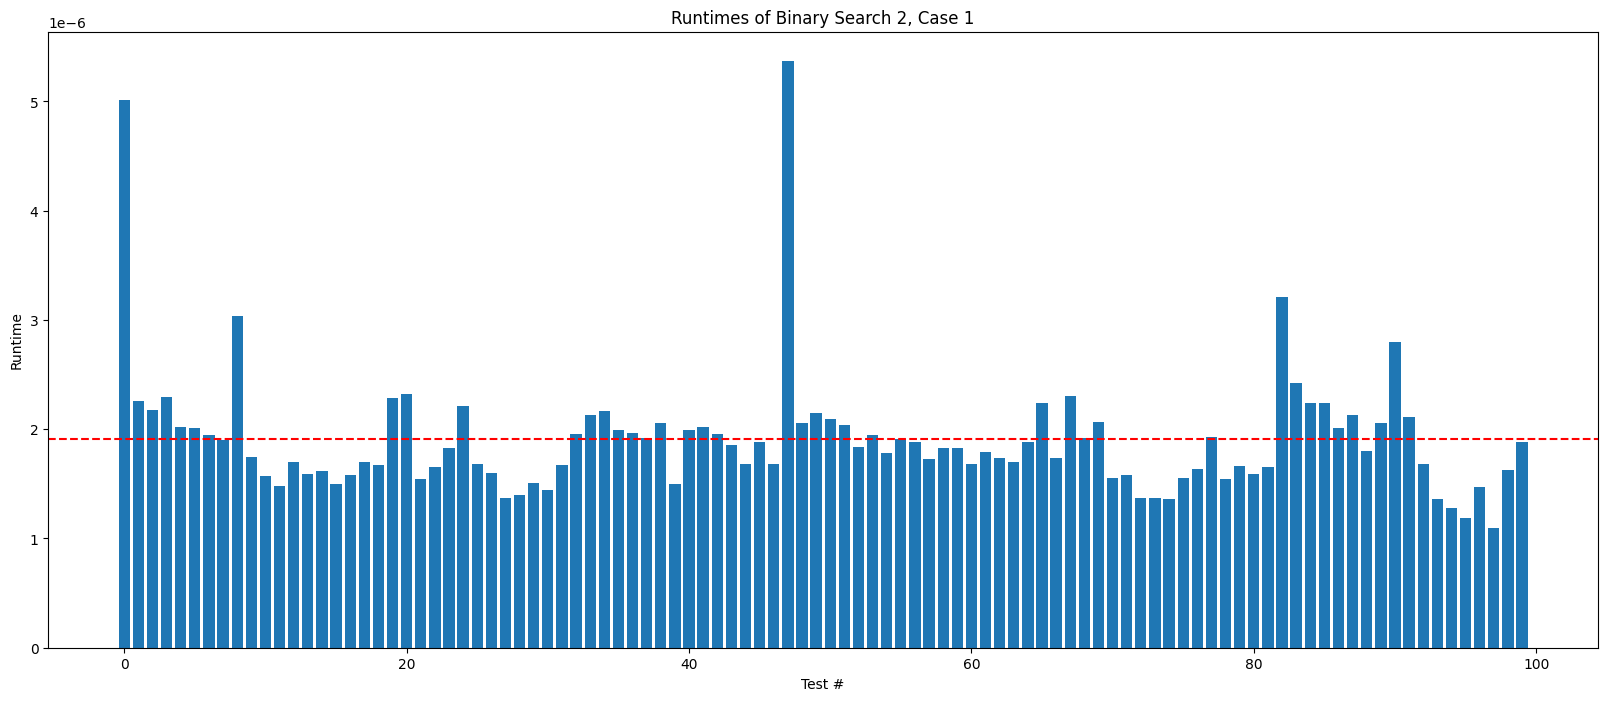

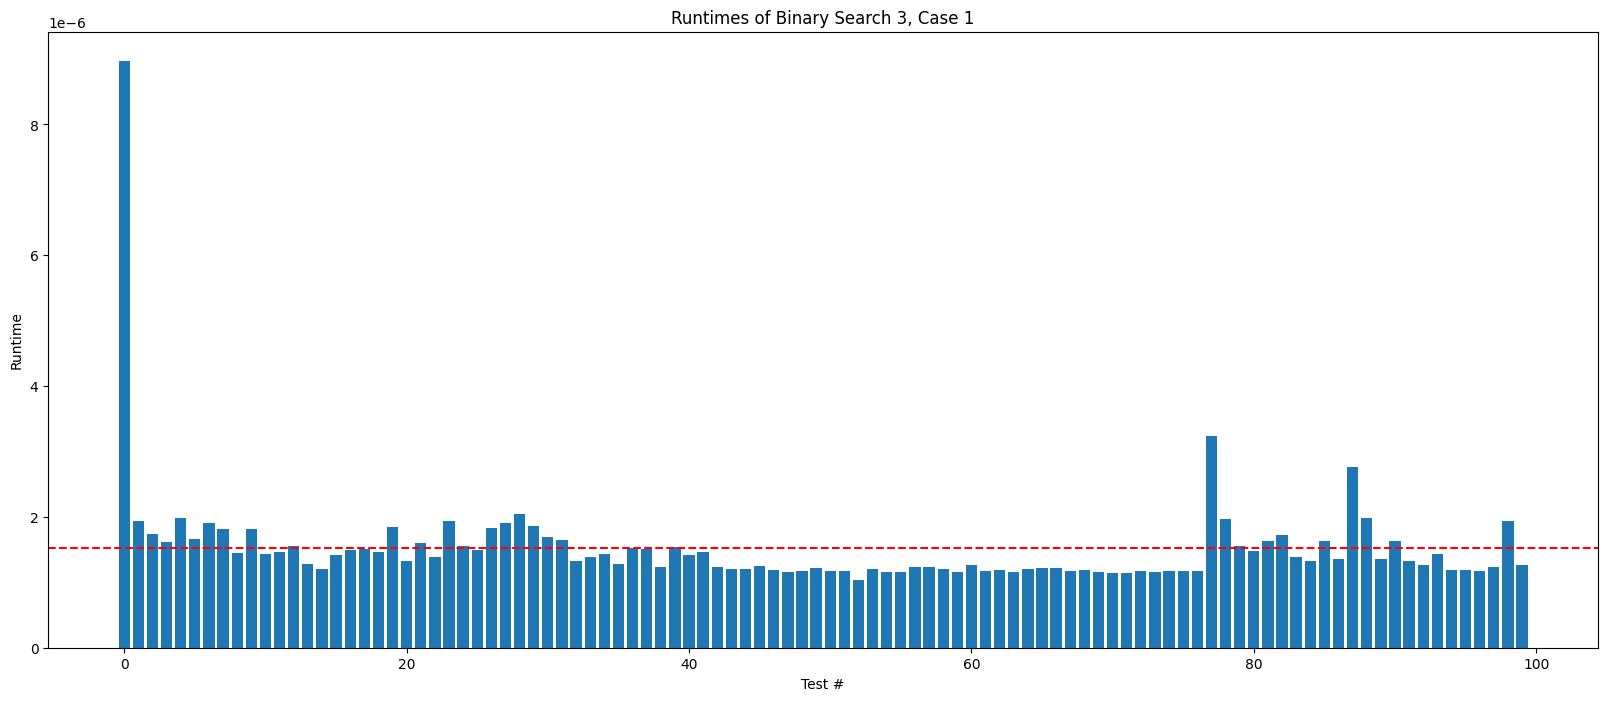

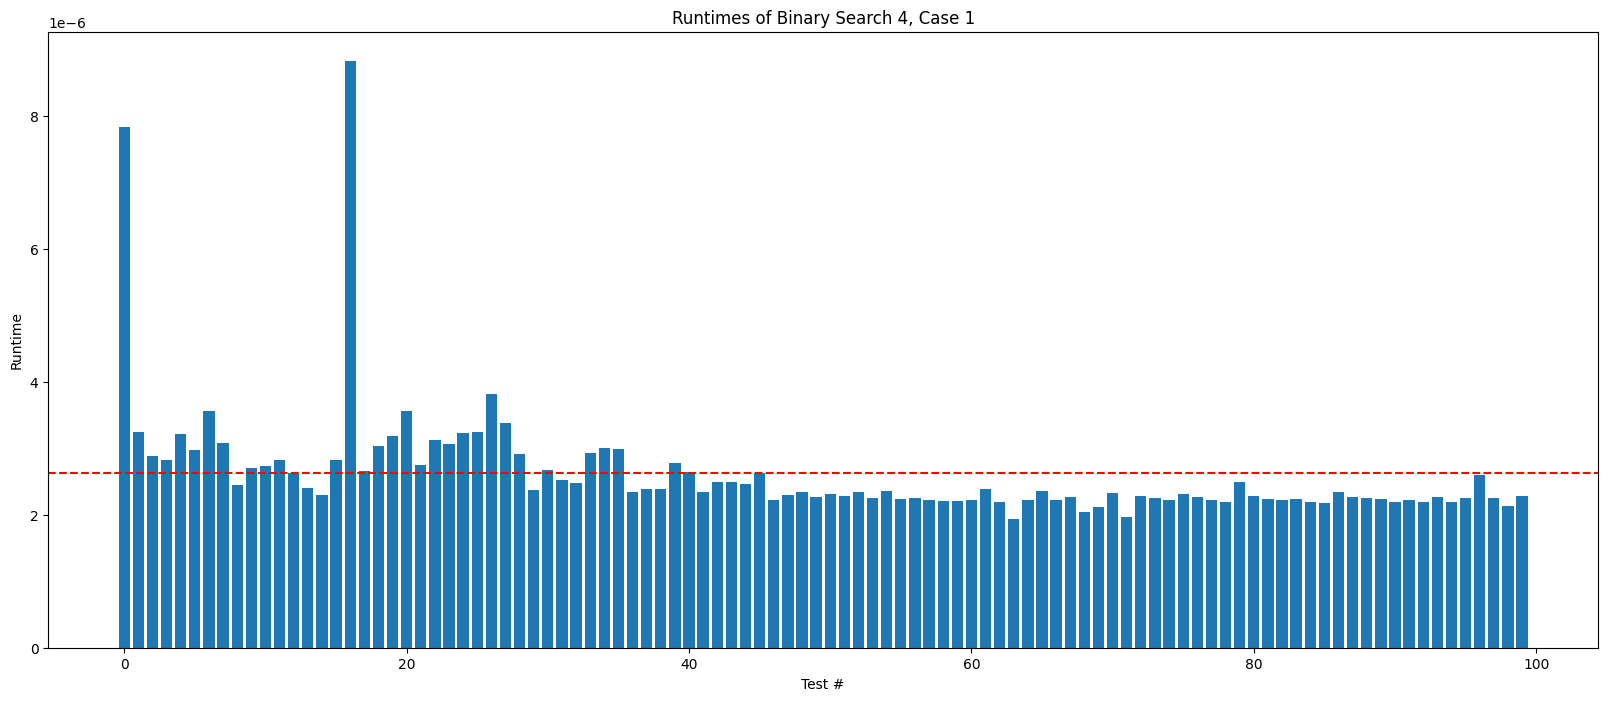

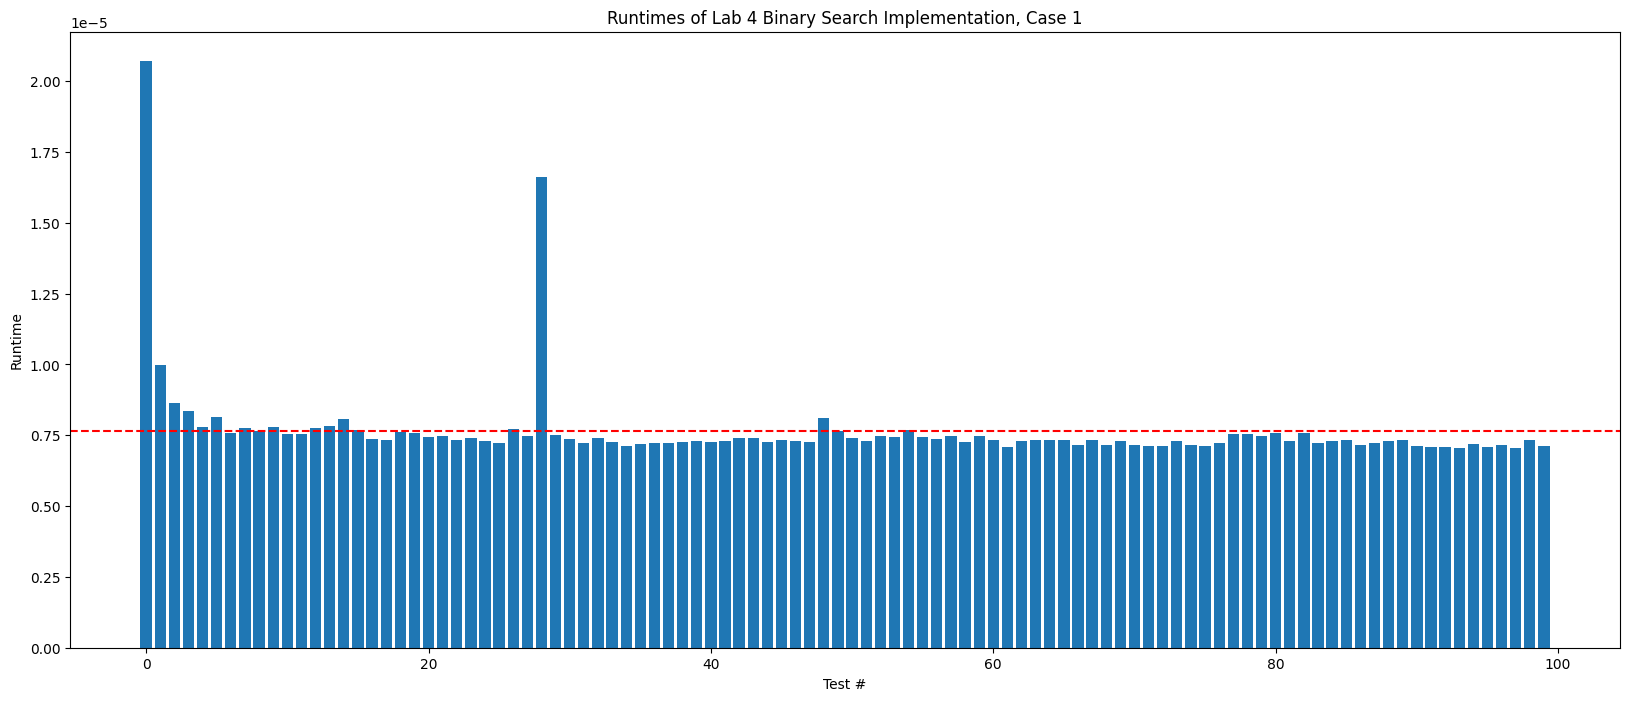

In [67]:
# Case 1: Target element is not located in the array
# Testing Case 1 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):

    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 1")

# Testing Case 2 with BS2
bs2_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 1")

# Testing Case 1 with BS3
bs3_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 1")

# Testing Case 1 with BS4
bs4_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 1")

# Testing Case 1 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):

    my_list = rand_list(50)
    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 1")



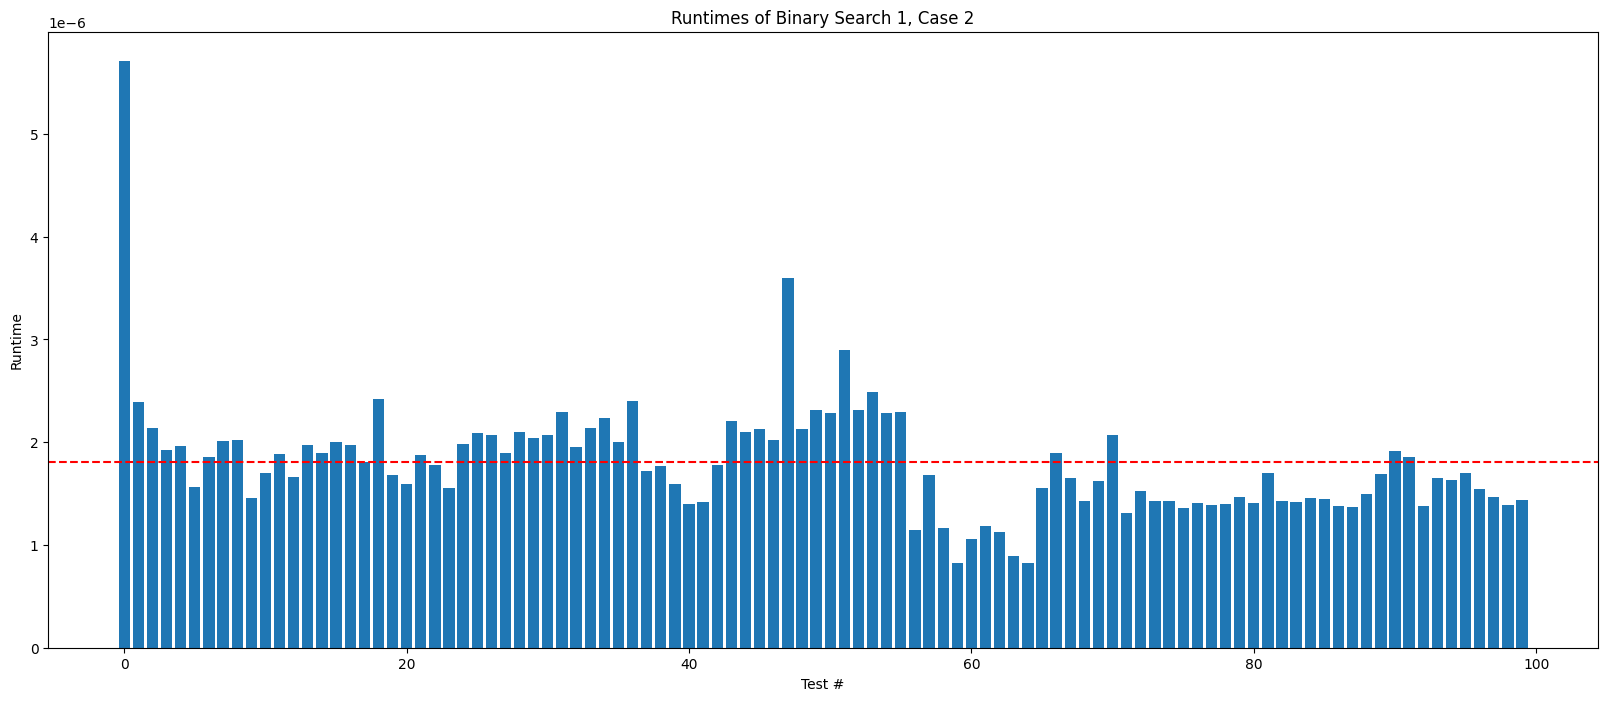

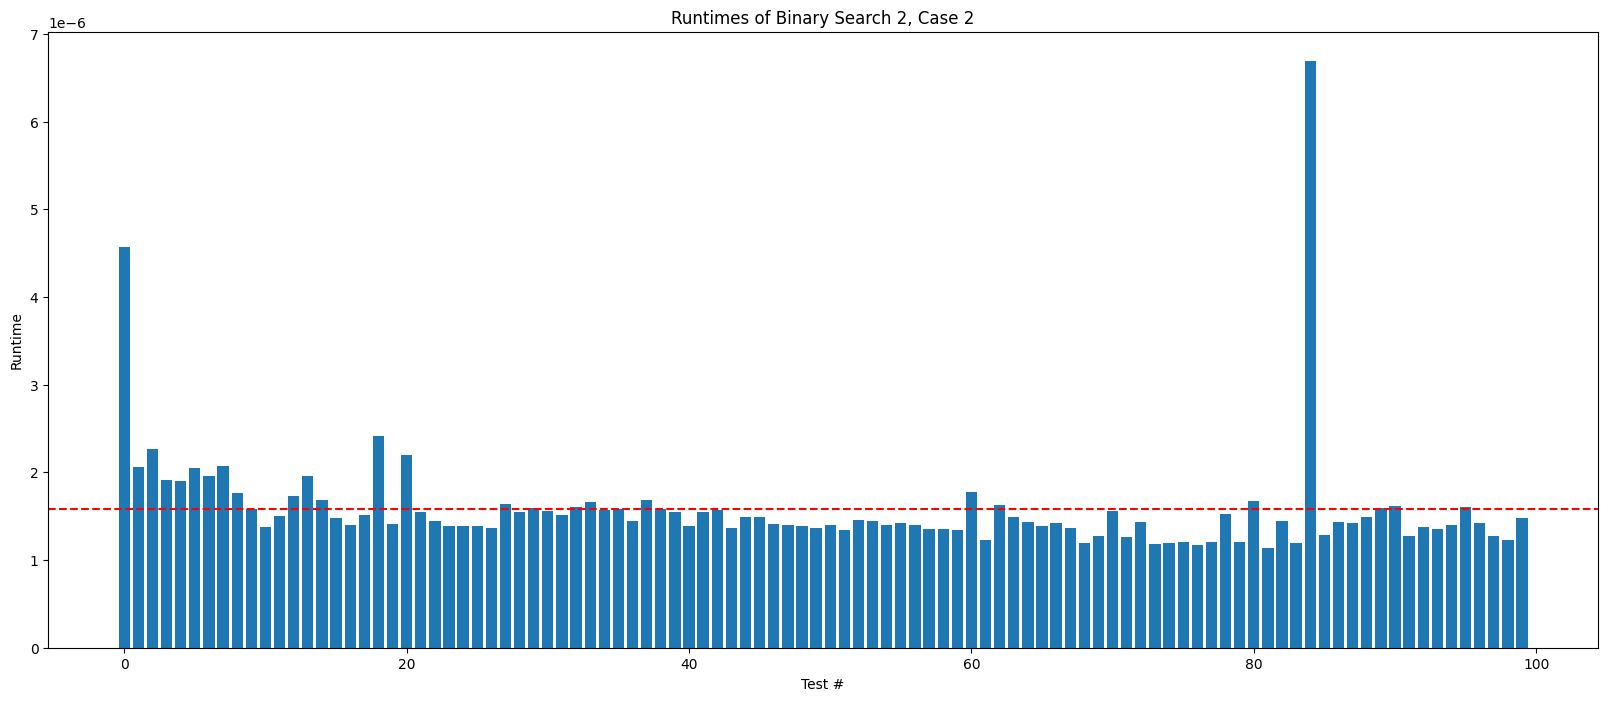

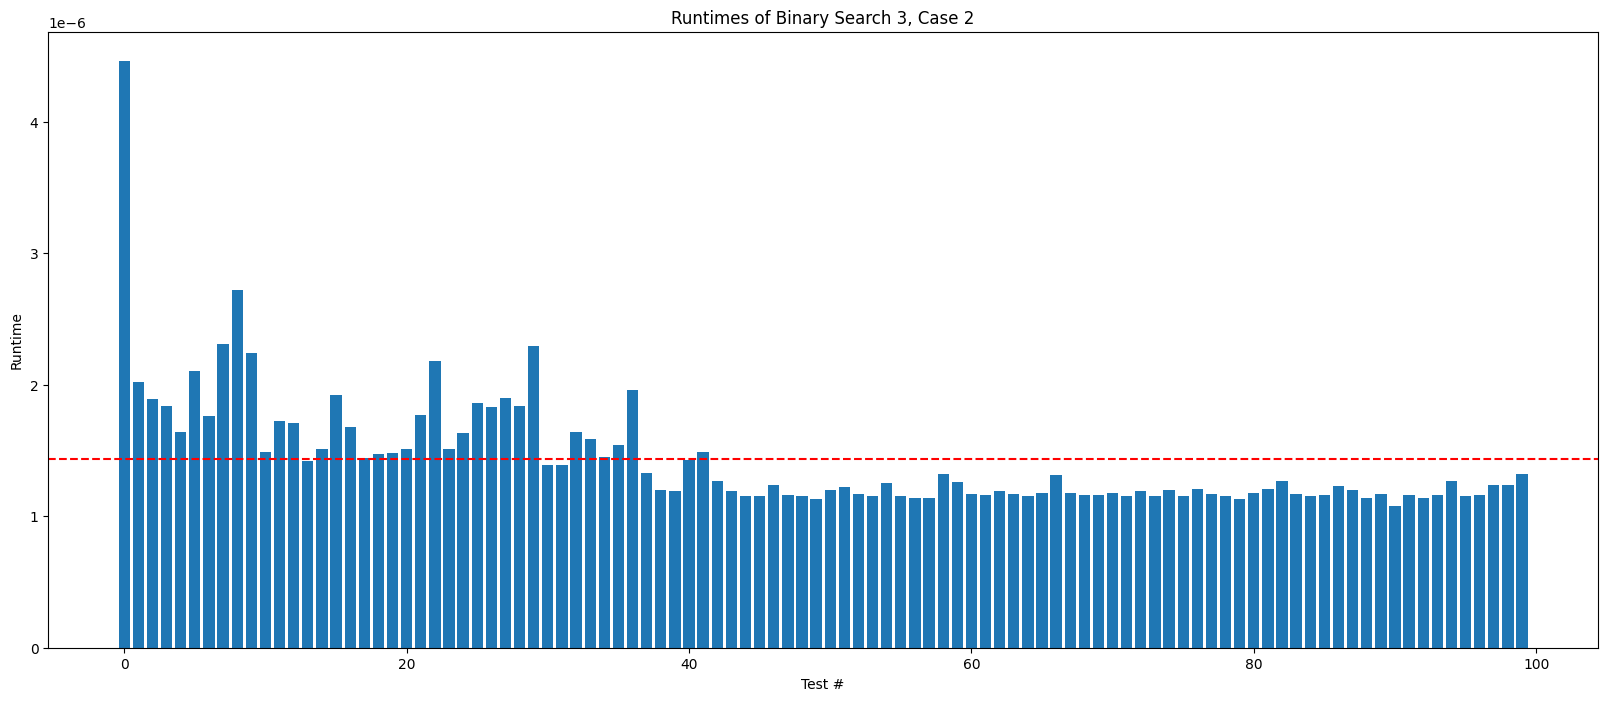

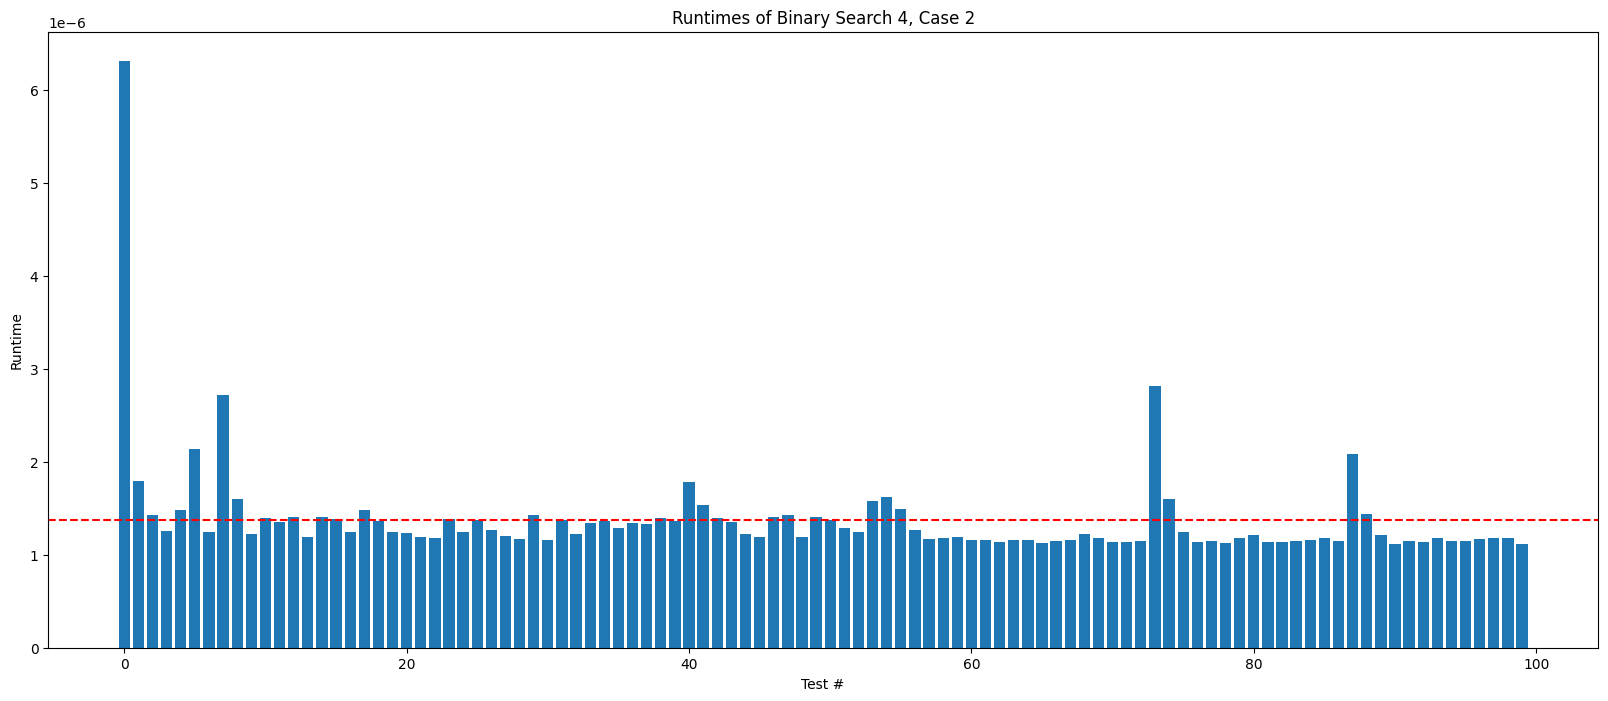

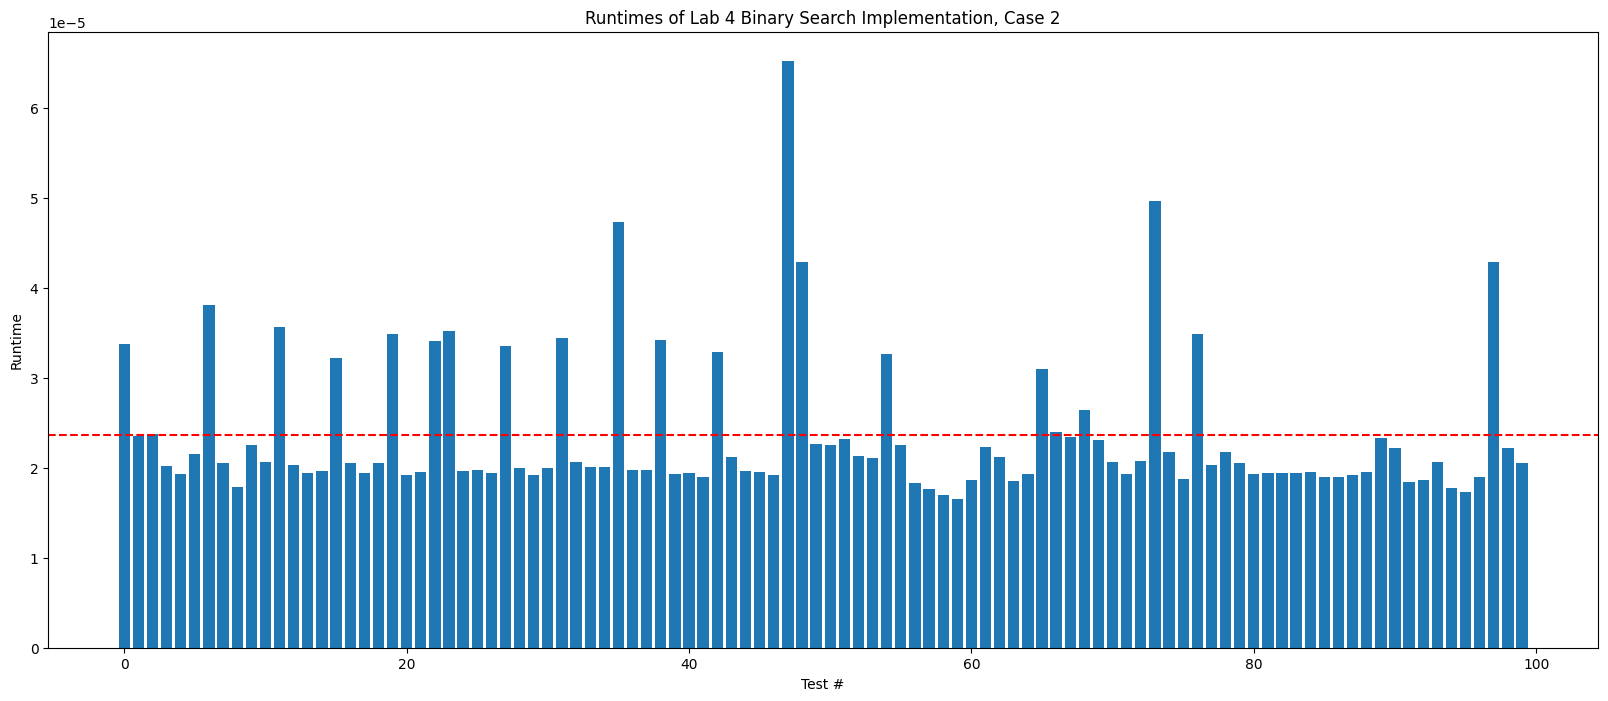

In [68]:
# Case 2: Target element is the last element in the array

# Testing Case 2 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):

    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find = 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 2")

# Testing Case 2 with BS2
bs2_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 2")

# Testing Case 2 with BS3
bs3_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 2")

# Testing Case 2 with BS4
bs4_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 2")

# Testing Case 2 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):

    my_list = bs_insert(rand_list(50), 101, -1)
    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 2")



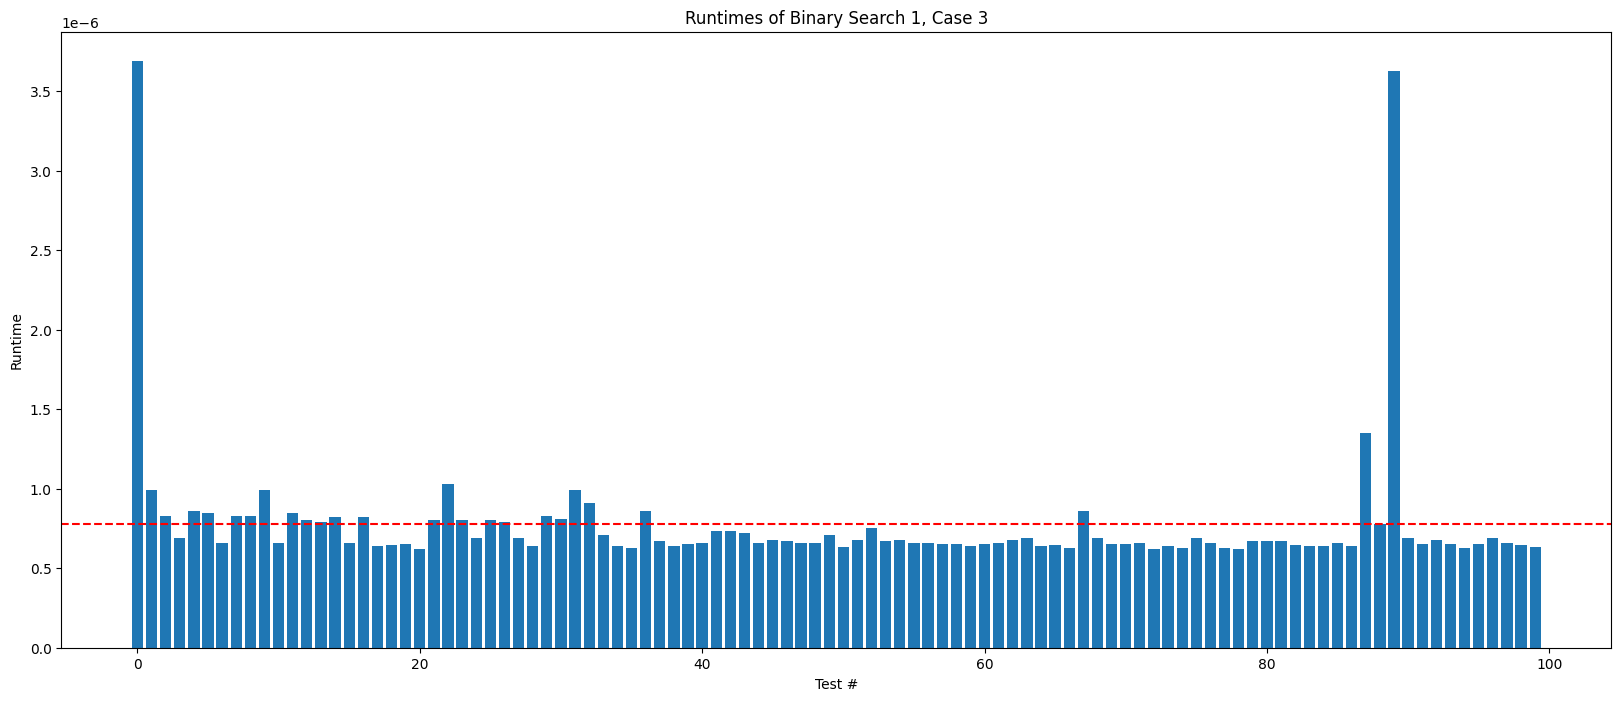

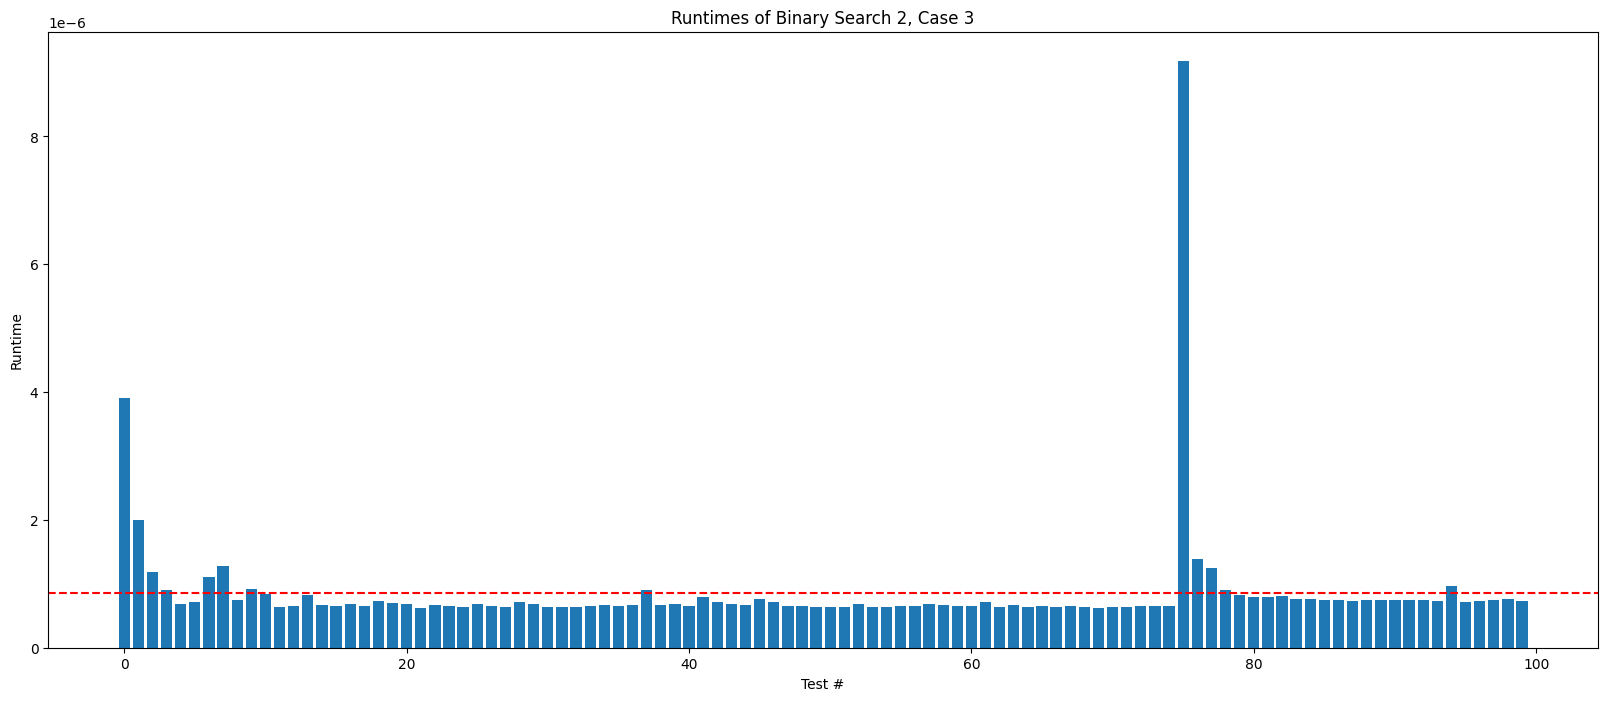

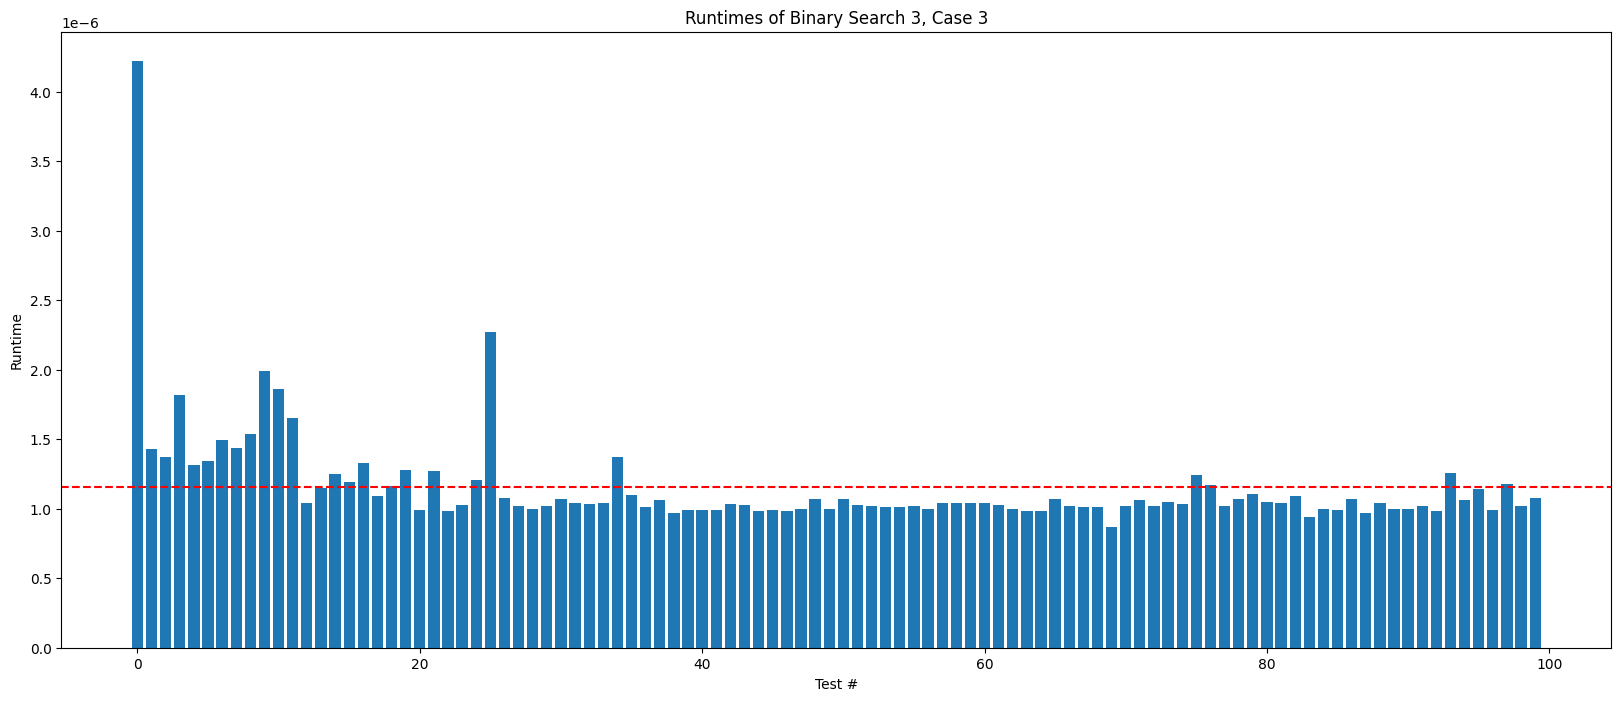

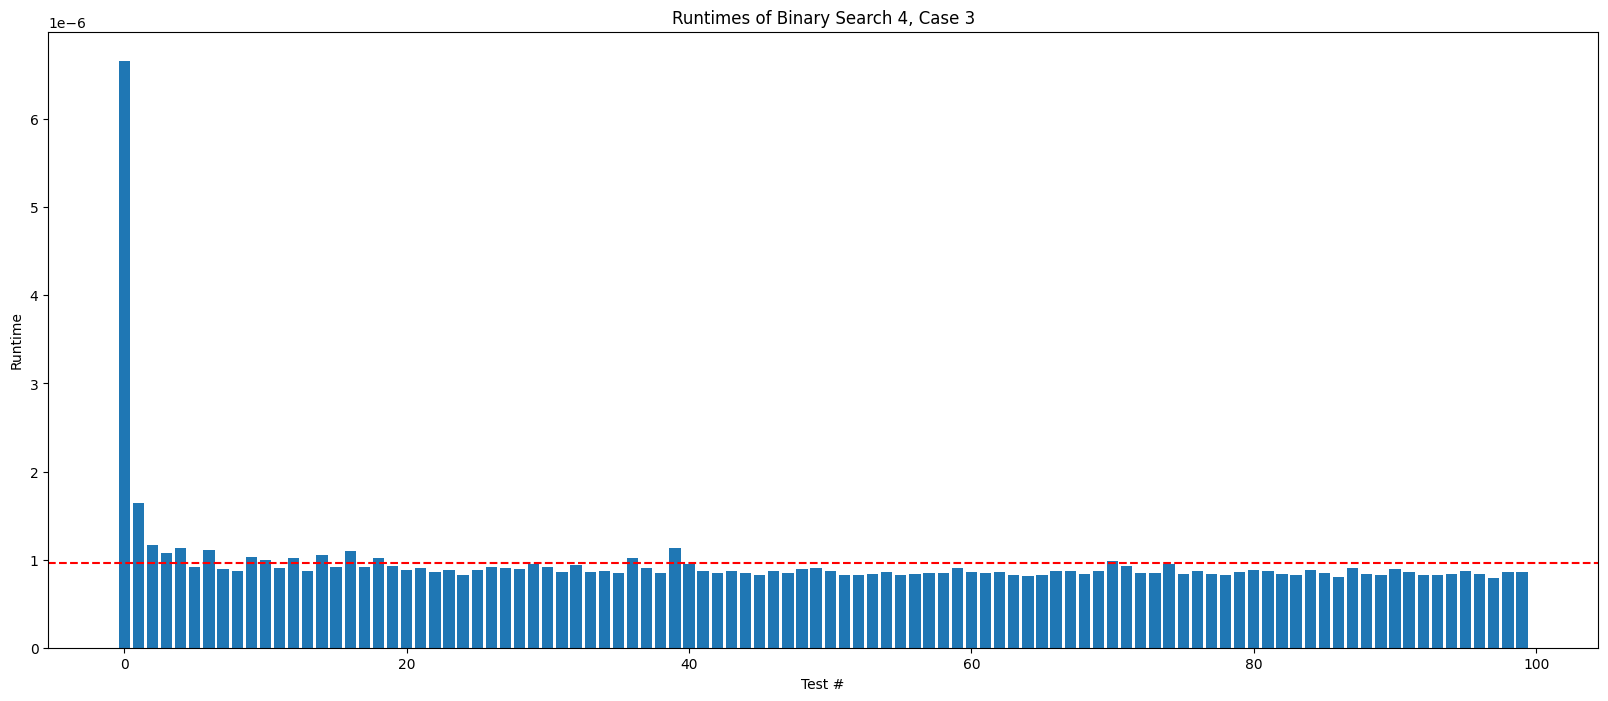

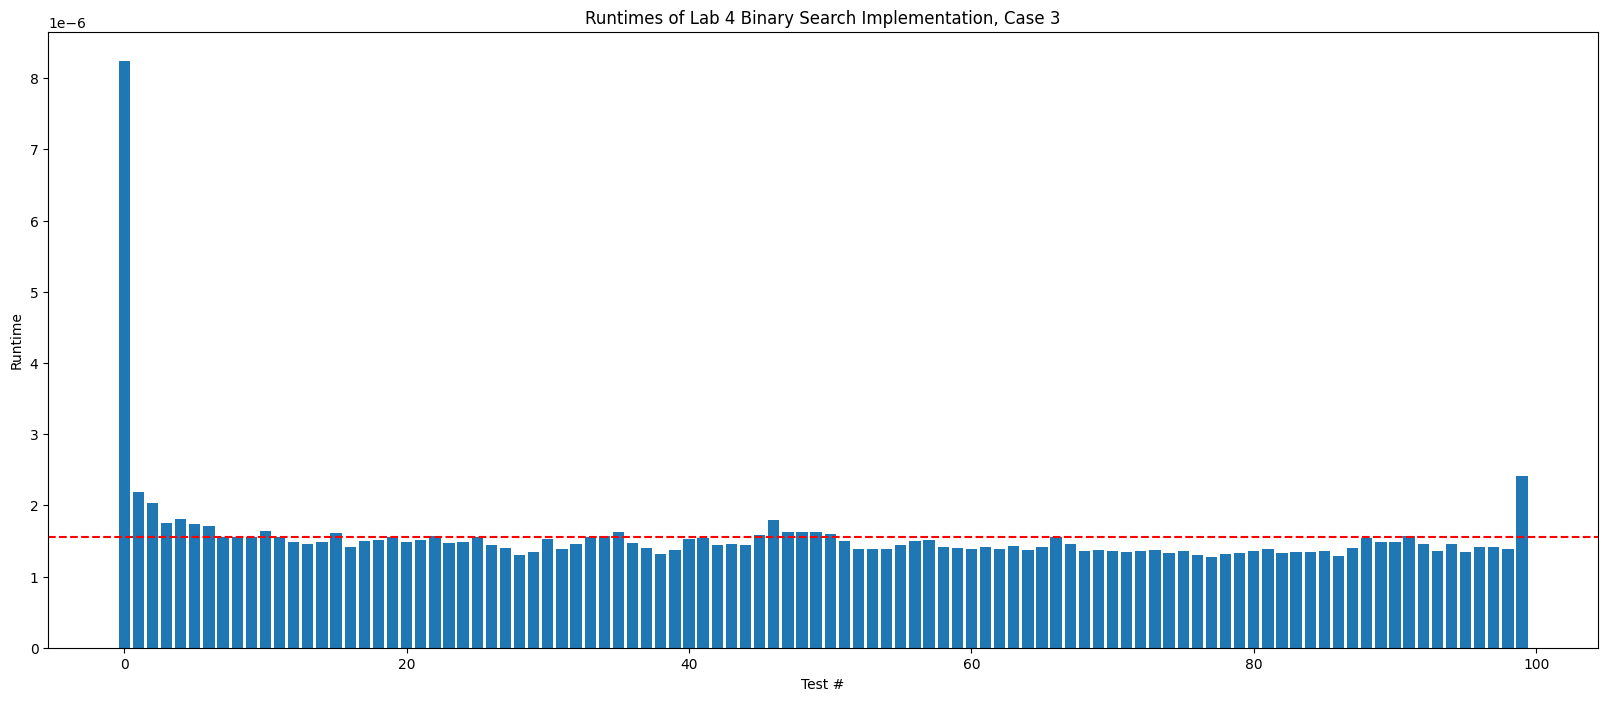

In [69]:
# Case 3: Lists with multiple elements that are the same value
# I'm going to have each tested array structured the same: 5 of the same elements at the end
# Testing Case 3 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):

    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 3")

# Testing Case 3 with BS2
bs2_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 3")

# Testing Case 3 with BS3
bs3_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 3")

# Testing Case 1 with BS4
bs4_run_times = []
for _ in range(runs):

    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 3")

# Testing Case 3 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):

    # Building the array needed for this experiment
    first_insert = bs_insert(rand_list(45), 101, -1)
    second_insert = bs_insert(first_insert, 101, -1)
    third_insert = bs_insert(second_insert, 101, -1)
    fourth_insert = bs_insert(third_insert, 101, -1)
    my_list = bs_insert(fourth_insert, 101, -1)

    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 3")




**Reflection:**  

Outline of experiments:
- There are three main experiments for this section, all based on the typical worst runtime cases for binary search:
    - Binary search where the target element is not located in the array
    - Binary search where the target element is the last element of the array
    - Binary search where there are multiple elements of the same value
- For each case, the array is built and modified to ensure the constraints for each case are followed.
- I kept the array length and the range of values the same. Each array tested is 50 elements in length with a max value of 101.
    - The max value in arrays tested in the first case is 100. This is because the algorithm intentionally is trying to look for 101, which is not in the range of values in the generated array.
- Each experiment uses 100 trials.
- I used the three binary search implementations in class, the recursive binary search implementation covered in Lab 2, and the proposed 2D binary search implementation in this lab.
- Since there are 3 cases and 5 different binary search implementations, there are 3 x 5 = 15 experiments/plots.

Description of observations:  

Case 1: Binary search where the target element is not located in the array  

- There are 5 plots for this experiment.

- For BS 1, the plot seems pretty consistent for the first half of trials, then runtime decreases in the last half.
- BS 1 seems pretty uniform except for some significantly high runtimes in the first 40 trials.
- The first half of trials for BS 1 tend to stay above the average, and the last half tend to stay below the average.

- For BS 2, the results are pretty uniform with most trials staying at or below the average.
- Similar to BS 1's performance, There are a few outliers with high runtimes within the first 1-40 trials.

- For BS 3, performance is consistent with most trials below the runtime average.
- This plot had some individual high runtimes at the beginning and near the end.
- BS 3 has had the least runtime complexity so far.

- For BS 4, results were different as the last 25 trials seemed to be higher in runtime.
- The first ~75 trials are pretty uniform in performance. They are below the runtime average.
- BS 4 has a significantly lower average runtime than the other three binary search algorithms so far.

- BS 5 (the implemenation I made for this lab) performance for this case very uniform, with most trials at or below the average runtime.
- There are a few trials that are above the average at the beginning of the plot.
- In terms of average performance, BS 5 is second-most efficient. BS 4 is first.  

Case 2: Binary search where the target element is the last element in the array  

- There are 5 plots for this experiment.

- For BS 1, performance is not very uniform. There is a moderate amount of trials that are above or below the average.
- There is an exceptionally high runtime for the first trial.
- The average runtime for this experiment is significantly low.

- For BS 2, performance is very uniform.
- Similar to BS 1, there is a large runtime for the first trial.

- BS 3 performance looks extremely similar to BS 2 performance. The trials are uniform in runtime and there is one high runtime at the first trial.
- Average runtime for BS 3 is a little bit less than the runtime for BS 2.

- Average runtime for BS 4 is larger than both BS 2 and BS 3. Most trials stay at or below the plot's average.
- The first trial for the BS 4 plot is significantly higher than other first trials for algorithms in this case.

- For BS 5, the trials are not consistently below the average or above the average runtime.
- The first trial has a higher runtime than the other trials in its plot, but the difference in first trial runtime versus average runtime for this plot is much less than other plots in this case.
- BS 5 has the fourth-most fastest runtime of all algorithms tested in this case. BS 4 is fifth.  

Case 3: Binary search where there are multiple elements of the same value
- There are 5 plots for this experiment.

- For BS 1, runtime performance is not uniform at all.
- The runtime of the first trial is significantly higher than first trials of other experiments with this algorithm.

- For BS 2, runtime performance is very uniform, with most trials at or below the runtime average.
- The first trial has a higher runtime than the other trials in the plot.
- Any runtimes that are above the average (and not the first trial) are within the last 15 trials.

- For BS 3, performance is very similar to BS 2 in this experiment.
- There are more trials below the runtime average.
- The first few trials in this experiment are above the runtime average.
- The runtime of the first trial is higher than the first trial runtime of the BS 2 algorithm experiment.

- Performance is not consistent in BS 4. There are many trials with runtimes significantly above or below the average runtime.
- There are a few significantly high runtimes within the first 25 trials, and a few within the last 5 trials.
- The average runtime for BS 4 is the highest out of all averages in the experiment for this case.

- Performance is pretty consistent for BS 5. Most trial runtimes are below the average, except for a portion in the middle which are significantly high.
- There are higher runtimes for the first few trials in this experiment.
- Compared to other binary search algorithms in this experiment, BS 5 is the third-most efficient in runtime. However, most average runtimes for this case were pretty similar.

When does dynamic binary search outperform others?
- BS 5 tends to outperform in the first case: when the target element is not located in the array.
- While this algorithm did perform relatively well in the other cases, it seemed to be about the same in efficiency as the algorithms it was tested against.

When is dynamic binary search overkill?
- Looking at the results of BS 5's performance in each of the three cases, using dynamic binary search is definitely overkill when the target element is at the end of the array you're searching.
- Dynamic binary search also doesn't seem to have an advantage if there are multiple elements of the same value in the array you're searching.
- It seems that the best scenario to use a dynamic binary search algorithm is if you're unsure if the target element will even be in the array you're searching.